In [121]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
data_folder = os.path.join('../..', 'data')
file_name = "Data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
leagues = ['E0', 'E1', 'E2', 'E3']
start_year, end_year = 2005, 2025
util.fetch_data_into_file(data_folder=data_folder, file_name=file_name, start_year=start_year, end_year=end_year, leagues=leagues)

Data fetched and saved to ../../data/Data.csv


In [136]:
data = util.load_data(data_folder, file_name)
data = data[data['HomeTeam'].isna() == False]
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,PSH,PSD,PSA
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,M Riley,3.0,13.0,2.0,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506,NaN,NaN,NaN
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,G Poll,10.0,12.0,5.0,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506,NaN,NaN,NaN
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,R Styles,15.0,7.0,7.0,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506,NaN,NaN,NaN
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,C Foy,15.0,13.0,8.0,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506,NaN,NaN,NaN
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,M Halsey,4.0,16.0,2.0,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38924,E3,2024-10-22,Harrogate,Port Vale,0.0,1.0,A,0.0,0.0,D,E Bell,12.0,20.0,3.0,4.0,6.0,11.0,5.0,9.0,1.0,2.0,0.0,0.0,2425,4.16,3.72,1.85
38925,E3,2024-10-22,Milton Keynes Dons,Accrington,2.0,1.0,H,1.0,0.0,H,R Martin,5.0,14.0,2.0,6.0,14.0,20.0,1.0,5.0,4.0,6.0,0.0,0.0,2425,1.62,4.25,5.02
38926,E3,2024-10-22,Salford,Swindon,2.0,1.0,H,1.0,0.0,H,D Drysdale,16.0,6.0,4.0,2.0,17.0,9.0,6.0,1.0,2.0,1.0,0.0,0.0,2425,2.36,3.37,3.06
38927,E3,2024-10-22,Tranmere,Grimsby,0.0,1.0,A,0.0,0.0,D,B Toner,18.0,10.0,4.0,2.0,13.0,8.0,4.0,2.0,6.0,2.0,0.0,0.0,2425,2.08,3.21,3.88


In [112]:
home_factor, draw_factor, away_factor = data['FTR'].value_counts(normalize=True)['H'], data['FTR'].value_counts(normalize=True)['D'], data['FTR'].value_counts(normalize=True)['A']
home_factor, draw_factor, away_factor

(np.float64(0.43471558501618623),
 np.float64(0.26442628847438465),
 np.float64(0.3008581265094291))

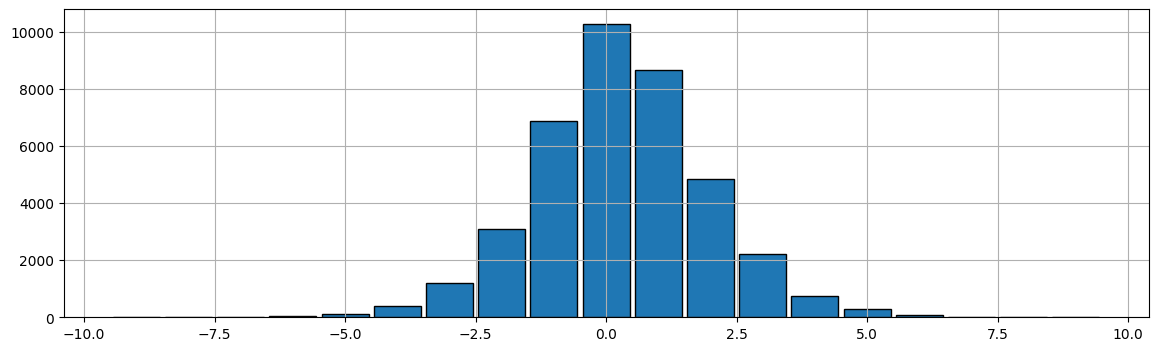

In [113]:
data['Goal difference'] = data['FTHG'] - data['FTAG']
util.plot_histogram(data['Goal difference'], figsize=figsize)

In [114]:
ELO = util.ELO(data, init_rating=1500, draw_factor=draw_factor, k_factor=32, home_advantage=100)
data = ELO.perform_simulations(data)
data = ELO.get_probabilities(data)
data


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,PSH,PSD,PSA,Goal difference,Home ELO,Away ELO,ELO diff,Home_prob_ELO,Draw_prob_ELO,Away_prob_ELO
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,M Riley,3.0,13.0,2.0,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,0.0,1500,1500,0,0.367787,0.264426,0.367787
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,G Poll,10.0,12.0,5.0,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,-2.0,1500,1500,0,0.367787,0.264426,0.367787
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,R Styles,15.0,7.0,7.0,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,0.0,1500,1500,0,0.367787,0.264426,0.367787
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,C Foy,15.0,13.0,8.0,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,0.0,1500,1500,0,0.367787,0.264426,0.367787
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,M Halsey,4.0,16.0,2.0,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,NaN,NaN,NaN,0.0,1500,1500,0,0.367787,0.264426,0.367787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38924,E3,2024-10-22,Harrogate,Port Vale,0.0,1.0,A,0.0,0.0,D,E Bell,12.0,20.0,3.0,4.0,6.0,11.0,5.0,9.0,1.0,2.0,0.0,0.0,4.16,3.72,1.85,-1.0,884.164686,979.522901,-95.358214,0.269304,0.19362,0.537076
38925,E3,2024-10-22,Milton Keynes Dons,Accrington,2.0,1.0,H,1.0,0.0,H,R Martin,5.0,14.0,2.0,6.0,14.0,20.0,1.0,5.0,4.0,6.0,0.0,0.0,1.62,4.25,5.02,1.0,943.35281,845.248347,98.104463,0.541705,0.191684,0.266611
38926,E3,2024-10-22,Salford,Swindon,2.0,1.0,H,1.0,0.0,H,D Drysdale,16.0,6.0,4.0,2.0,17.0,9.0,6.0,1.0,2.0,1.0,0.0,0.0,2.36,3.37,3.06,1.0,851.579011,811.292143,40.286868,0.440768,0.233901,0.32533
38927,E3,2024-10-22,Tranmere,Grimsby,0.0,1.0,A,0.0,0.0,D,B Toner,18.0,10.0,4.0,2.0,13.0,8.0,4.0,2.0,6.0,2.0,0.0,0.0,2.08,3.21,3.88,-1.0,877.486263,876.206332,1.279931,0.370116,0.263452,0.366432


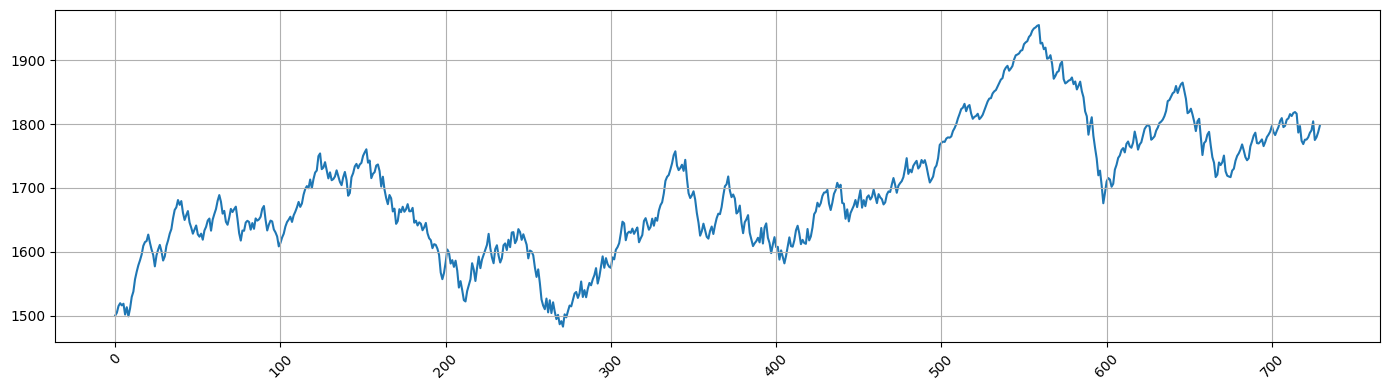

In [115]:
ELO_Liverpool = util.extract_elo_history(data, 'Liverpool')
#ELO_Liverpool.set_index('Date', inplace=True)
util.plot_series(ELO_Liverpool['ELO'], figsize=figsize)

In [138]:
data = util.add_discrete_league_columns(data)
data = util.add_discrete_result_columns(data)
data = util.add_discrete_season_columns(data)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,PSH,PSD,PSA,E0,E1,E2,E3,D,A,H,0506,0607,0708,0809,0910,1011,1112,1213,1314,1415,1516,1617,1718,1819,1920,2021,2122,2223,2324,2425
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,M Riley,3.0,13.0,2.0,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506,NaN,NaN,NaN,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,G Poll,10.0,12.0,5.0,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506,NaN,NaN,NaN,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,R Styles,15.0,7.0,7.0,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506,NaN,NaN,NaN,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,C Foy,15.0,13.0,8.0,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506,NaN,NaN,NaN,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,M Halsey,4.0,16.0,2.0,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506,NaN,NaN,NaN,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38924,E3,2024-10-22,Harrogate,Port Vale,0.0,1.0,A,0.0,0.0,D,E Bell,12.0,20.0,3.0,4.0,6.0,11.0,5.0,9.0,1.0,2.0,0.0,0.0,2425,4.16,3.72,1.85,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
38925,E3,2024-10-22,Milton Keynes Dons,Accrington,2.0,1.0,H,1.0,0.0,H,R Martin,5.0,14.0,2.0,6.0,14.0,20.0,1.0,5.0,4.0,6.0,0.0,0.0,2425,1.62,4.25,5.02,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
38926,E3,2024-10-22,Salford,Swindon,2.0,1.0,H,1.0,0.0,H,D Drysdale,16.0,6.0,4.0,2.0,17.0,9.0,6.0,1.0,2.0,1.0,0.0,0.0,2425,2.36,3.37,3.06,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
38927,E3,2024-10-22,Tranmere,Grimsby,0.0,1.0,A,0.0,0.0,D,B Toner,18.0,10.0,4.0,2.0,13.0,8.0,4.0,2.0,6.0,2.0,0.0,0.0,2425,2.08,3.21,3.88,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
